## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, display_html

#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
path = './D36-41 探索性資料分析 (EDA)_Dataset/'
df_train = pd.read_csv(path+'Titanic_train.csv')
df_test = pd.read_csv(path+'Titanic_test.csv')

## Q1: 判斷測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
# Q1: 判斷測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
print(f'df_test : {", ".join(df_test.columns)}')
print(f'df_test : {", ".join(df_train.columns)}')

df_test : PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
df_test : PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [5]:
# 會判断哪些列存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(('df_test'+' INFO').center(40,'-'))
print(df_test.info(),'\n'*3)

isnull_result = df_test.isnull().any()

print(f'判斷測試資料集，是否有遺失值:\n{isnull_result}\n\n\n',
      f'統計 data 裡有空值的變數個數:{isnull_result.sum()}')

--------------df_test INFO--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None 



判斷測試資料集，是否有遺失值:
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked  

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [6]:
#合併資料
data = df_train.append(df_test)

#輸出INFO
print(('data'+' INFO').center(40,'-'))
print(data.info(),'\n'*3)


# 遺失超過六成的欄位
print(f'遺失超過六成的欄位:\t{", ".join([col for col in data.columns if data[col].isnull().sum() / len(data[col]) > 0.6])}')

# 輸出遺失個數/總個數
for col in data.columns:
    if data[col].isnull().sum() / len(data[col]) > 0.6:
        print(col+f'遺失個數/總個數:\t{data[col].isnull().sum()}/{len(data[col])}')

---------------data INFO----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None 



遺失超過六成的欄位:	Cabin
Cabin遺失個數/總個數:	1014/1309


In [7]:
# 觀察Cabin的樣態
print(data['Cabin'].value_counts())

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2                 4
B96 B98            4
                  ..
B36                1
C103               1
A29                1
D6                 1
B37                1
Name: Cabin, Length: 186, dtype: int64


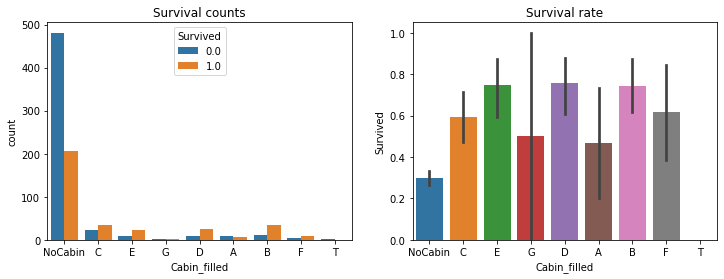

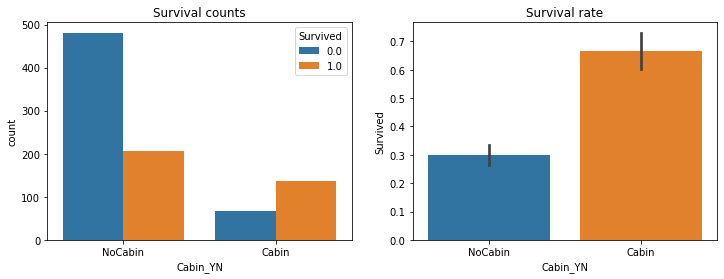

In [8]:
# 方法1:遺失的屬於另一類，直接填充'NoCabin'。 
data['Cabin_filled'] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

# 畫出死亡總數、死亡率的圖
col_name = 'Cabin_filled'
plt.figure(figsize=(12,4))
for i,fig in enumerate({'Survival counts':
                        lambda title: sns.countplot(col_name, None,
                                                    'Survived', data=data).set_title(title),
                        'Survival rate':
                        lambda title: sns.barplot(col_name,'Survived', data=data).set_title(title)
                       }.items()):
    sub = plt.subplot(1, 2, i+1)
    sub = fig[1](fig[0])
plt.show()

# 將有值與無值做比較，#畫出死亡總數、死亡率的圖
data['Cabin_YN'] = data['Cabin'].apply(lambda x : 'Cabin' if not pd.isnull(x) else 'NoCabin')
col_name = 'Cabin_YN'
plt.figure(figsize=(12,4))
for i,fig in enumerate({'Survival counts':
                        lambda title: sns.countplot(col_name, None,
                                                    'Survived', data=data).set_title(title),
                        'Survival rate':
                        lambda title: sns.barplot(col_name,'Survived', data=data).set_title(title)
                       }.items()):
    sub = plt.subplot(1, 2, i+1)
    sub = fig[1](fig[0])
plt.show()

#### 結論: Cabin缺失的欄位死亡率較高,並不適合直接填充值，又因其遺失超過六成，該考慮捨棄該欄位。